In [2]:
# Housekeeping: imports and data setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets created in Notebook 01
students_df = pd.read_csv('students.csv')
weather_df = pd.read_json('weather.json')

# Recreate merged weather dataset
city_info = pd.DataFrame({
    'city': ['Limerick', 'Galway', 'Dublin', 'Cork', 'Belfast'],
    'population': [94192, 79934, 554554, 208669, 343542],
    'province': ['Munster', 'Connacht', 'Leinster', 'Munster', 'Ulster']
})

weather_merged = pd.merge(weather_df, city_info, on='city')

# Recreate derived column
students_df['average_score'] = (
    students_df['math_score'] + students_df['science_score']
) / 2

## Notebook 2: Visualisation with Matplotlib

Visualisation helps us:
- Compare values across categories
- Identify relationships between variables
- Inspect distributions and outliers

Each plot below serves a specific analytical purpose.

### 2.1 Line Plot — Comparing Student Scores

Line plots are useful for comparing multiple measurements across the same categories.

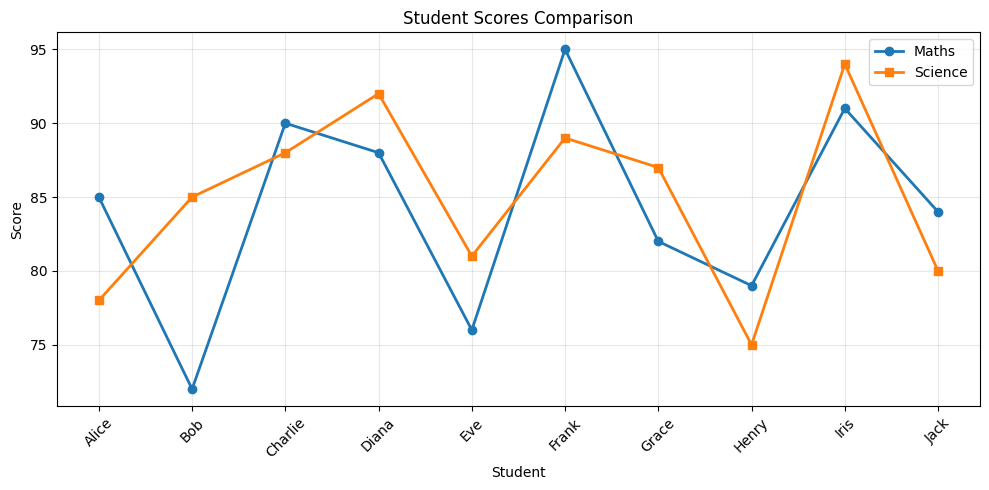

In [3]:
# Line plot - Student scores
plt.figure(figsize=(10, 5))
plt.plot(students_df['name'], students_df['math_score'], 
         marker='o', label='Maths', linewidth=2)
plt.plot(students_df['name'], students_df['science_score'], 
         marker='s', label='Science', linewidth=2)
plt.xlabel('Student')
plt.ylabel('Score')
plt.title('Student Scores Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2.2 Bar Charts — Weather Comparison by City

Bar charts are suitable for comparing values across discrete categories.

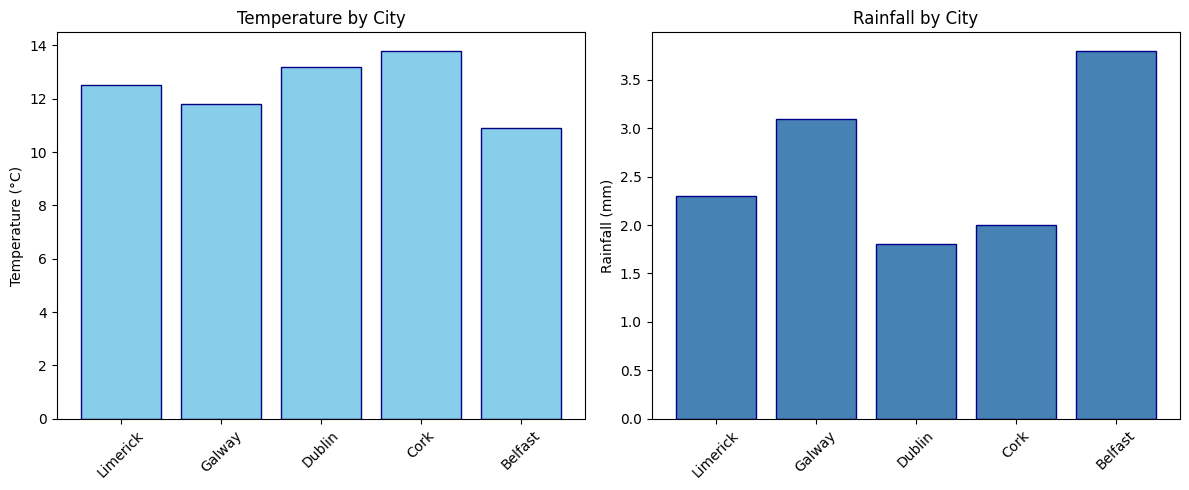

In [4]:
# Bar chart - Weather comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Temperature bar chart
axes[0].bar(weather_merged['city'], weather_merged['temperature'], 
            color='skyblue', edgecolor='navy')
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('Temperature by City')
axes[0].tick_params(axis='x', rotation=45)

# Rainfall bar chart
axes[1].bar(weather_merged['city'], weather_merged['rainfall_mm'], 
            color='steelblue', edgecolor='darkblue')
axes[1].set_ylabel('Rainfall (mm)')
axes[1].set_title('Rainfall by City')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 2.3 Scatter Plot — Attendance vs Performance

Scatter plots help identify relationships between variables.
Trend lines can highlight linear patterns.

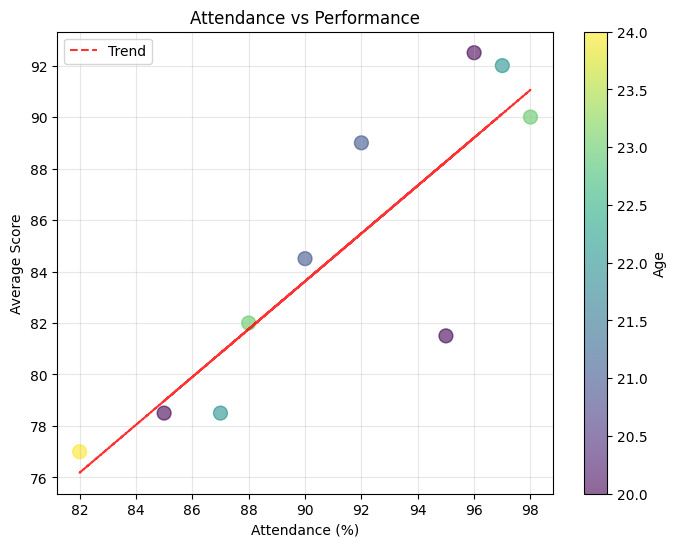

In [5]:
# Scatter plot with trend line
plt.figure(figsize=(8, 6))
plt.scatter(students_df['attendance'], students_df['average_score'], 
            s=100, alpha=0.6, c=students_df['age'], cmap='viridis')
plt.colorbar(label='Age')

# Add trend line
z = np.polyfit(students_df['attendance'], students_df['average_score'], 1)
p = np.poly1d(z)
plt.plot(students_df['attendance'], p(students_df['attendance']), 
         "r--", alpha=0.8, label='Trend')

plt.xlabel('Attendance (%)')
plt.ylabel('Average Score')
plt.title('Attendance vs Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 2.4 Histograms — Score Distributions

Histograms show how values are distributed and can reveal skew or outliers.

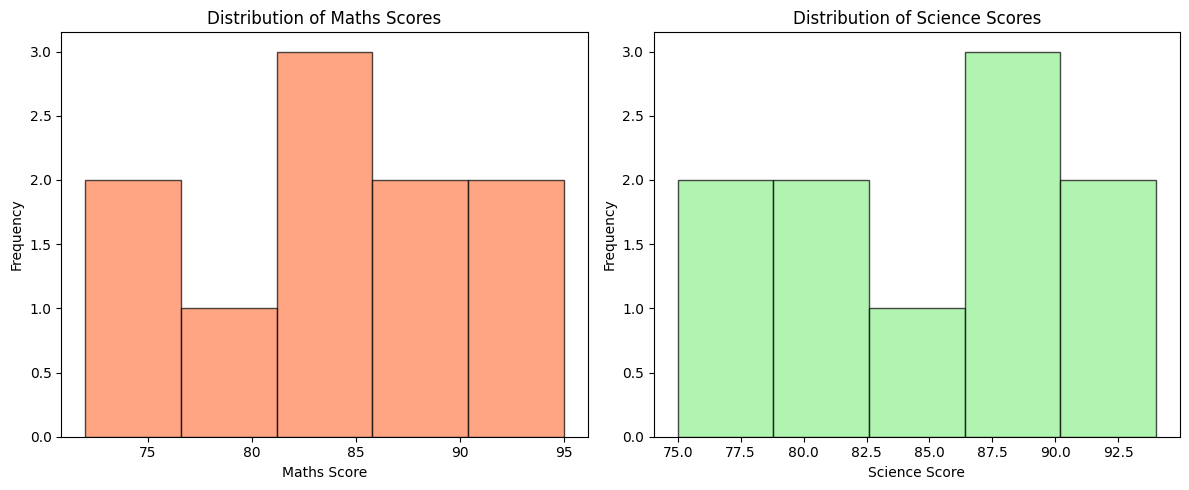

In [6]:
# Histogram - Score distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(students_df['math_score'], bins=5, 
             color='coral', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Maths Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Maths Scores')

axes[1].hist(students_df['science_score'], bins=5, 
             color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Science Score')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Science Scores')

plt.tight_layout()
plt.show()

### 2.5 Dashboard-Style Visualisation (Demonstration)

### About This Example

This section demonstrates how multiple plots can be combined into a single
dashboard-style figure using Matplotlib.

You are **not expected to memorise or fully understand every line of code here**.
The goal is to:
- See what is possible with Matplotlib
- Understand that complex visualisations are built by composing simple plots
- Recognise patterns you may reuse later (e.g. subplots, annotations)

Focus on *what each plot shows*, not *how every detail is implemented*.

/var/folders/by/lc50hft53519f4cfrxmq5v540000gn/T/ipykernel_92330/1894226309.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot([students_df['attendance'], students_df['math_score'],


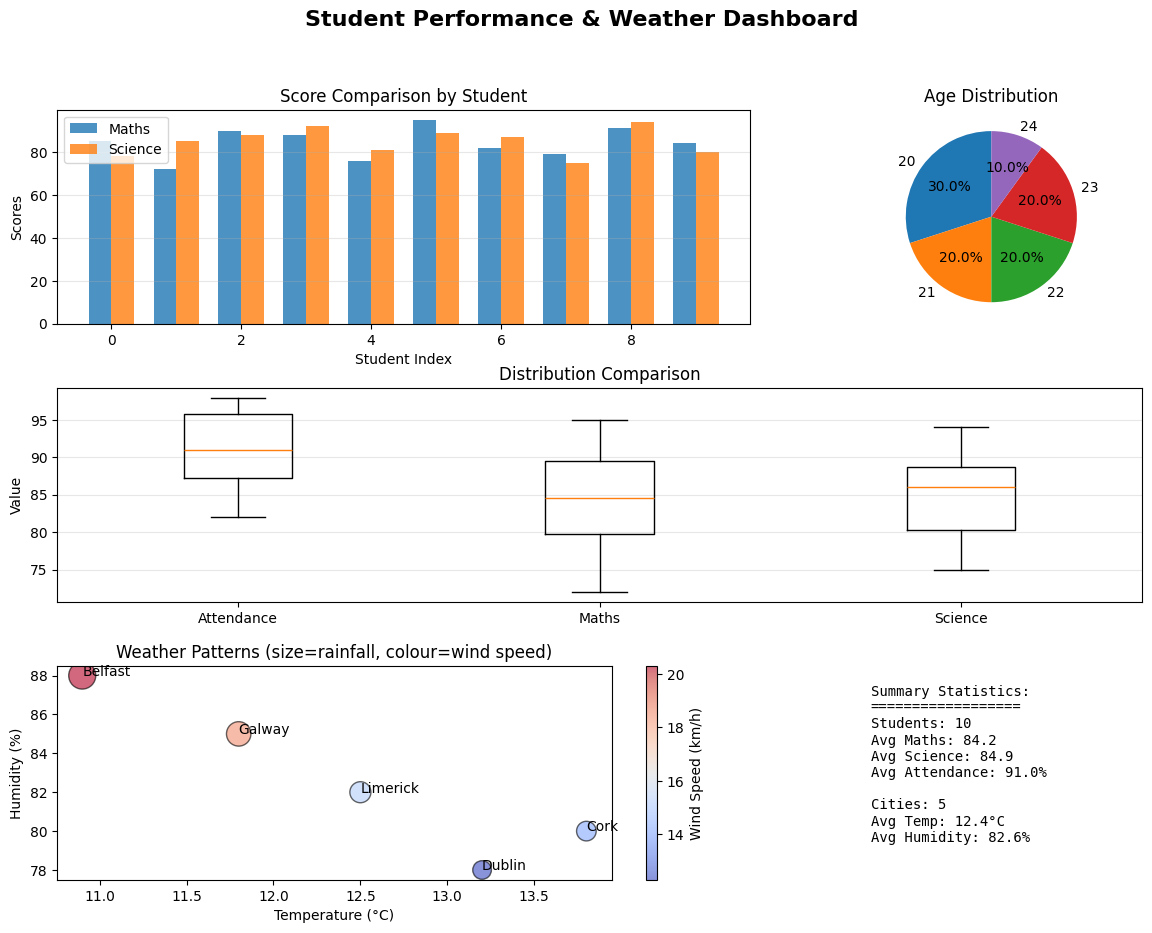

In [7]:
# Create a dashboard-style visualisation
fig = plt.figure(figsize=(14, 10))

# Define grid
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Plot 1: Score comparison (spans 2 columns)
ax1 = fig.add_subplot(gs[0, :2])
x = np.arange(len(students_df))
width = 0.35
ax1.bar(x - width/2, students_df['math_score'], width, label='Maths', alpha=0.8)
ax1.bar(x + width/2, students_df['science_score'], width, label='Science', alpha=0.8)
ax1.set_xlabel('Student Index')
ax1.set_ylabel('Scores')
ax1.set_title('Score Comparison by Student')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Age distribution
ax2 = fig.add_subplot(gs[0, 2])
age_counts = students_df['age'].value_counts().sort_index()
ax2.pie(age_counts.values, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Age Distribution')

# Plot 3: Attendance box plot
ax3 = fig.add_subplot(gs[1, :])
ax3.boxplot([students_df['attendance'], students_df['math_score'], 
             students_df['science_score']], 
            labels=['Attendance', 'Maths', 'Science'])
ax3.set_ylabel('Value')
ax3.set_title('Distribution Comparison')
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Weather scatter
ax4 = fig.add_subplot(gs[2, :2])
scatter = ax4.scatter(weather_merged['temperature'], weather_merged['humidity'], 
                     s=weather_merged['rainfall_mm']*100, 
                     c=weather_merged['wind_speed'], 
                     cmap='coolwarm', alpha=0.6, edgecolors='black')
for i, city in enumerate(weather_merged['city']):
    ax4.annotate(city, (weather_merged['temperature'].iloc[i], 
                        weather_merged['humidity'].iloc[i]))
ax4.set_xlabel('Temperature (°C)')
ax4.set_ylabel('Humidity (%)')
ax4.set_title('Weather Patterns (size=rainfall, colour=wind speed)')
plt.colorbar(scatter, ax=ax4, label='Wind Speed (km/h)')

# Plot 5: Summary statistics
ax5 = fig.add_subplot(gs[2, 2])
ax5.axis('off')
summary_text = f"""Summary Statistics:
==================
Students: {len(students_df)}
Avg Maths: {students_df['math_score'].mean():.1f}
Avg Science: {students_df['science_score'].mean():.1f}
Avg Attendance: {students_df['attendance'].mean():.1f}%

Cities: {len(weather_merged)}
Avg Temp: {weather_merged['temperature'].mean():.1f}°C
Avg Humidity: {weather_merged['humidity'].mean():.1f}%
"""
ax5.text(0.1, 0.5, summary_text, fontsize=10, family='monospace',
         verticalalignment='center')

plt.suptitle('Student Performance & Weather Dashboard', fontsize=16, fontweight='bold')
plt.show()

---

## Lab 01 – Notebook 02 Cheat Sheet
### Visualisation with Matplotlib

---

### Basic Setup

```python
import matplotlib.pyplot as plt

# Always end with
plt.show()
```

---

### Choosing the Right Plot

| Plot Type | Use When |
|-----------|----------|
| Line plot | Comparing trends across ordered categories |
| Bar chart | Comparing values across discrete categories |
| Scatter plot | Exploring relationships between two variables |
| Histogram | Inspecting distribution and spread |
| Box plot | Comparing distributions, spotting outliers |
| Pie chart | Showing proportions of a whole |

---

### Line Plot

**Best for:** Trends, multiple series comparison

```python
plt.plot(x, y, marker='o', label='Series 1')
plt.plot(x, y2, marker='s', label='Series 2')
plt.legend()
```

---

### Bar Chart

**Best for:** Comparing values across categories

```python
plt.bar(categories, values, color='skyblue', edgecolor='black')
```

---

### Scatter Plot

**Best for:** Relationships between two numeric variables

```python
plt.scatter(x, y, s=100, alpha=0.6, c=colour_values, cmap='viridis')
plt.colorbar(label='Colour variable')
```

| Parameter | Purpose |
|-----------|---------|
| `s` | Marker size |
| `alpha` | Transparency (0–1) |
| `c` | Colour by values |
| `cmap` | Colour palette |

---

### Adding a Trend Line

```python
z = np.polyfit(x, y, 1)  # Linear fit
p = np.poly1d(z)
plt.plot(x, p(x), 'r--', label='Trend')
```

---

### Histogram

**Best for:** Distribution of a single variable

```python
plt.hist(values, bins=5, color='coral', edgecolor='black', alpha=0.7)
```

---

### Box Plot

**Best for:** Comparing distributions, finding outliers

```python
plt.boxplot([data1, data2, data3], labels=['A', 'B', 'C'])
```

---

### Always Label Your Plots

```python
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Descriptive Title')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
```

---

### Multiple Plots (Subplots)

```python
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(x, y)
axes[0].set_title('Left Plot')

axes[1].scatter(x, y)
axes[1].set_title('Right Plot')

plt.tight_layout()
plt.show()
```

| Subplots syntax | Layout |
|-----------------|--------|
| `(1, 2)` | 1 row, 2 columns |
| `(2, 1)` | 2 rows, 1 column |
| `(2, 2)` | 2×2 grid |

---

### Figure Size

```python
plt.figure(figsize=(10, 6))  # Width, Height in inches
```

---

### Common Customisations

| Code | Effect |
|------|--------|
| `rotation=45` | Rotate tick labels |
| `alpha=0.7` | Transparency |
| `edgecolor='black'` | Bar/marker borders |
| `linewidth=2` | Line thickness |
| `marker='o'` | Circle markers |
| `marker='s'` | Square markers |

---

### Quick Reference

```python
# Complete example
plt.figure(figsize=(10, 6))
plt.bar(df['name'], df['score'], color='steelblue', edgecolor='black')
plt.xlabel('Student')
plt.ylabel('Score')
plt.title('Student Performance')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
```

---

### Key Takeaways

- Choose plot type based on what you want to show
- Always label axes and add a title
- Use `tight_layout()` to prevent overlapping
- Scatter plots reveal relationships; histograms reveal distributions
- Subplots let you combine multiple views
- Visualisation is for **understanding data before modelling**